In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = dsets.MNIST(root='', train = True, download=True, transform = transforms.ToTensor())
val = dsets.MNIST(root='', train = False, download=True, transform = transforms.ToTensor())

In [4]:
train[0][0].shape

torch.Size([1, 28, 28])

In [5]:
train[0][1]

5

In [16]:
epochs = 50

lr = 0.01

model = nn.Sequential(nn.Linear(28**2, 16), nn.ReLU(), nn.Linear(16, 16), nn.ReLU(), nn.Linear(16, 10), nn.Sigmoid())

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr = lr)

cost = []
accuracy = []

tloader = DataLoader(dataset=train, batch_size = 100)
vloader = DataLoader(dataset=val, batch_size = 5000)

In [17]:
for epoch in range(epochs):
    
    for x, y in tloader:
        
        optimizer.zero_grad()
        
        z = model(x.view(-1, 28**2))
        
        reform = []
        
        for num in y:
            
            arr = [0.0 for i in range(10)]
            arr[num] = 1.0
            reform.append(arr)
            
        reform = torch.tensor(reform)
        
        loss = criterion(z, reform)
        cost.append(loss.item())
        
        loss.backward()
        optimizer.step()
        
    correct=0
    total=0
        
    for xt, yt in vloader:
        
        z = model(xt.view(-1, 28**2))
        
        _, yhat = torch.max(z.data, 1)
        
        correct += (yhat == yt).sum().item()
        
        total += len(yhat == yt)
        
    acc = correct/total * 100
    accuracy.append(acc)

Text(0.5, 0, 'iterations')

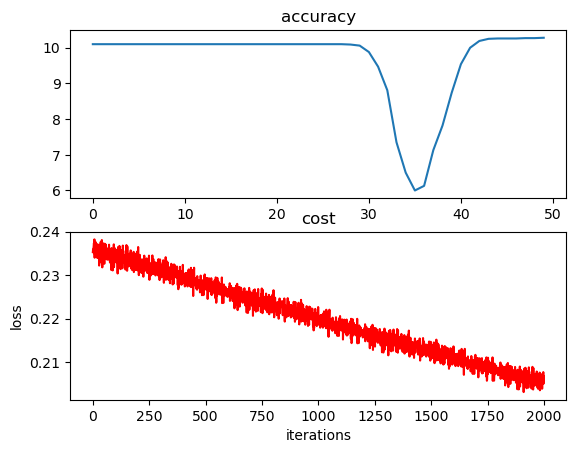

In [14]:
plt.subplot(2, 1, 1)
plt.plot(accuracy, label = 'accuracy')
plt.title('accuracy')
plt.subplot(2, 1, 2)
plt.plot(cost[:2000], label = 'loss', c='r')
plt.title('cost')
plt.ylabel('loss')
plt.xlabel('iterations')

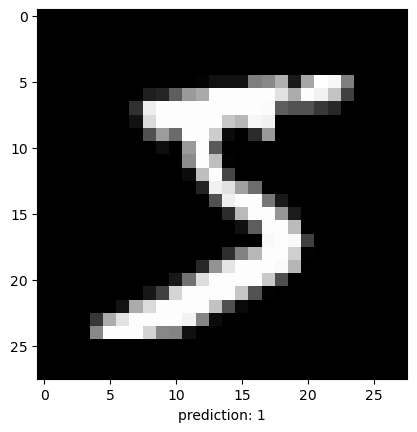

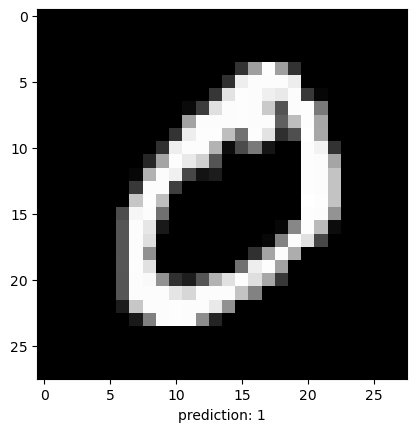

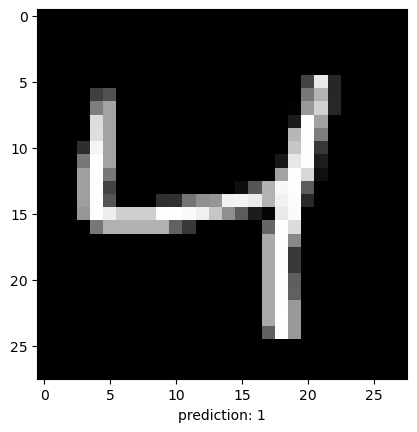

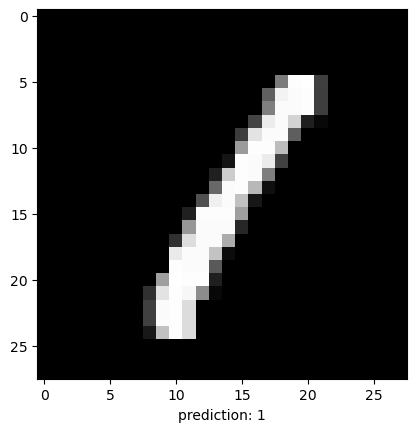

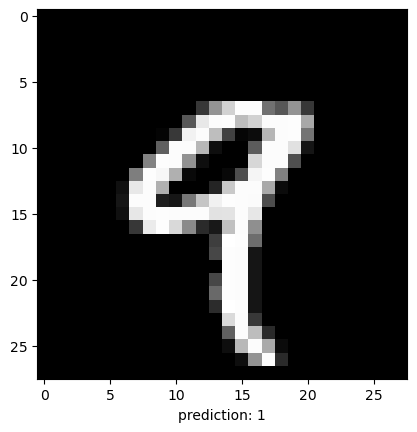

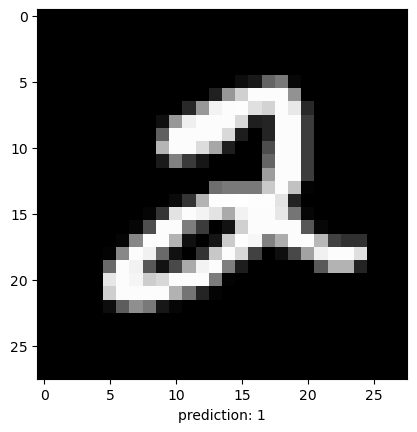

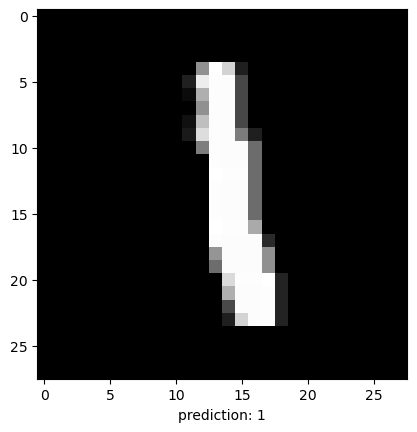

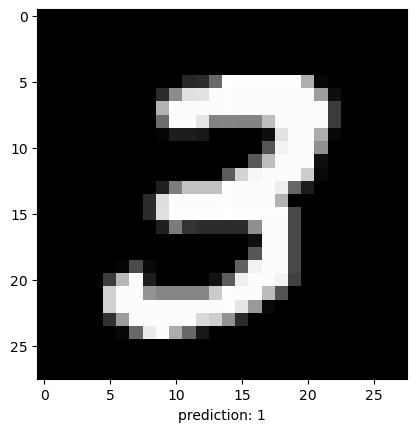

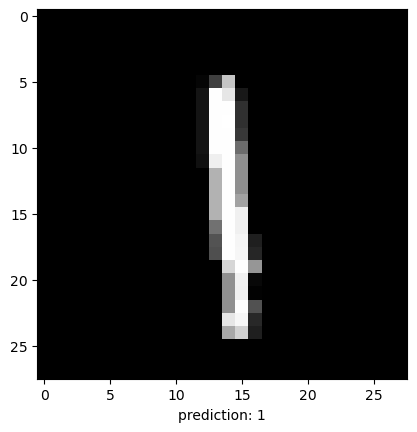

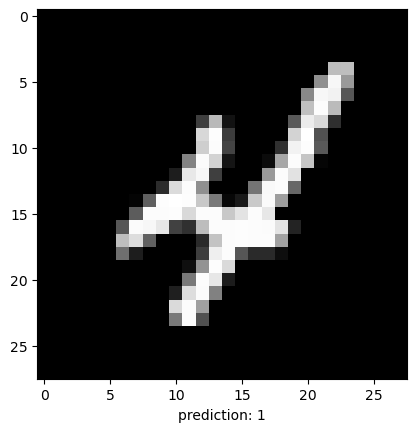

In [11]:
%matplotlib inline


for i in range(10):
    num = i
    img = train[num][0]
    acc = img.view(-1, 28**2)
    actual = train[num][1]

    plt.imshow(img.view(28, 28), cmap='gray')
    plt.xlabel('prediction: ' + str(model(acc).max(1)[1].item()))
    plt.show()